In [1]:
# script to plot footprint of flights used in this study 
# author: sofia chelpon
# created: Feb 11, 2020 

In [1]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [2]:
mypath = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_trace_gases_twp.nc'
toga_trc = xr.open_dataset(mypath)
toga_trc

<xarray.Dataset>
Dimensions:               (GGALT: 2277, GGLAT: 2277, GGLON: 2277, Time: 2277, Time_UTC: 2277)
Coordinates:
  * Time                  (Time) datetime64[ns] 2014-01-17T00:18:06 ... 2014-02-25T07:18:04
  * GGALT                 (GGALT) float32 3127.166 4212.603 ... 957.75916
  * GGLAT                 (GGLAT) float32 13.379817 13.258845 ... 13.409988
  * GGLON                 (GGLON) float32 144.9935 145.1362 ... 144.63826
  * Time_UTC              (Time_UTC) datetime64[ns] 2014-01-17T00:18:24 ... 2014-02-25T07:18:22
Data variables:
    Acetaldehyde          (Time) float32 ...
    n_Butane              (Time) float32 ...
    i_Butane              (Time) float32 ...
    Benzene               (Time) float32 ...
    C3H8                  (Time) float32 ...
    Methanol              (Time) float32 ...
    Bromoform             (Time) float32 ...
    Tetrachloroethylene   (Time) float32 ...
    Dibromomethane        (Time) float32 ...
    Dichloromethane       (Time) float32 ...
    Chloroform            (Time) float32 ...
    Carbon_Tetrachloride  (Time) float32 ...

In [3]:
mypath = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/testing_data_treatments/toga_trace_gases_fulldomain.nc'
toga_trc_whole = xr.open_dataset(mypath)
toga_trc_whole

<xarray.Dataset>
Dimensions:               (GGALT: 2705, GGLAT: 2705, GGLON: 2705, Time: 2705, Time_UTC: 2705)
Coordinates:
  * Time                  (Time) datetime64[ns] 2014-01-17T00:18:06 ... 2014-02-25T07:18:04
  * GGALT                 (GGALT) float32 3127.166 4212.603 ... 957.75916
  * GGLAT                 (GGLAT) float32 13.379817 13.258845 ... 13.409988
  * GGLON                 (GGLON) float32 144.9935 145.1362 ... 144.63826
  * Time_UTC              (Time_UTC) datetime64[ns] 2014-01-17T00:18:24 ... 2014-02-25T07:18:22
Data variables:
    Acetaldehyde          (Time) float32 ...
    n_Butane              (Time) float32 ...
    i_Butane              (Time) float32 ...
    Benzene               (Time) float32 ...
    C3H8                  (Time) float32 ...
    Methanol              (Time) float32 ...
    Bromoform             (Time) float32 ...
    Tetrachloroethylene   (Time) float32 ...
    Dibromomethane        (Time) float32 ...
    Dichloromethane       (Time) float32 ...
    Chloroform            (Time) float32 ...
    Carbon_Tetrachloride  (Time) float32 ...

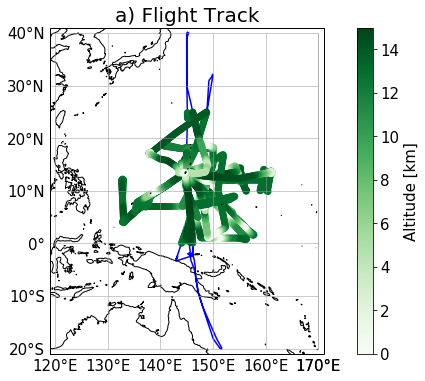

In [4]:
########## plot location 
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

b = ax.plot(toga_trc_whole.GGLON, toga_trc_whole.GGLAT, 'b', zorder = 0)
p = ax.scatter(toga_trc.GGLON, toga_trc.GGLAT, c = toga_trc.GGALT/1000, cmap = 'Greens')
ax.set_title('a) Flight Track', fontsize=20)

# colorbar
m = plt.cm.ScalarMappable(cmap='Greens')
m.set_array(toga_trc.GGALT.values/1000)
m.set_clim(0, 15)
cbar = plt.colorbar(m)
cbar.set_label('Altitude [km]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

# extents 
latmin = -20
latmax = 40
lonmin = 120 
lonmax = 170

ax.set_extent([lonmin-1, lonmax+1, latmin-1, latmax+1], ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='k', linewidth=1)
#ax.add_feature(cf.LAND, facecolor = 'g', edgecolor = 'k')
gg = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='0.6', linestyle='-')
gg.xlocator = mticker.FixedLocator([110, lonmin, 130, 140, 150, 160, lonmax, 170])
gg.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20, 30, 40])

gg.xlabels_top = False
gg.ylabels_right = False
gg.xformatter = LONGITUDE_FORMATTER
gg.yformatter = LATITUDE_FORMATTER
gg.xlabel_style = {'size': 15, 'color': 'k'}
gg.ylabel_style = {'size': 15, 'color': 'k'}

# save figure 
#fig.savefig('flight_footprint.svg', format='svg', dpi=1200)
fig.savefig('flight_footprint.pdf')

In [27]:
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_trace_gases_twp.nc'
awas_trc = xr.open_dataset(mypath2)
ut = np.where((awas_trc.GGALT > 12000) & (awas_trc.GGALT < 14000))

awas_trc_lat = awas_trc.GGLAT
awas_trc_lon = awas_trc.GGLON

awas_trc_lat_ut = awas_trc.GGLAT[ut]
awas_trc_lon_ut = awas_trc.GGLON[ut]


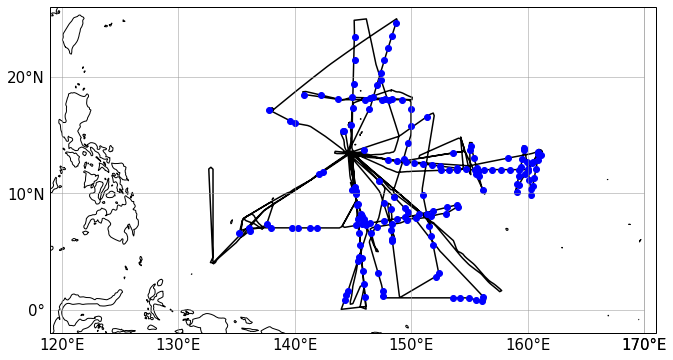

In [29]:
########## plot location 
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

b = ax.plot(toga_trc.GGLON, toga_trc.GGLAT, 'k', zorder = 0)
#p = ax.scatter(awas_trc_lon, awas_trc_lat, c = 'k')
p = ax.scatter(awas_trc_lon_ut, awas_trc_lat_ut, c = 'b')

#ax.set_title('a) Flight Track', fontsize=20)

# colorbar



# extents 
latmin = -1
latmax = 25
lonmin = 120 
lonmax = 170

ax.set_extent([lonmin-1, lonmax+1, latmin-1, latmax+1], ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='k', linewidth=1)
#ax.add_feature(cf.LAND, facecolor = 'g', edgecolor = 'k')
gg = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='0.6', linestyle='-')
gg.xlocator = mticker.FixedLocator([110, lonmin, 130, 140, 150, 160, lonmax, 170])
gg.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20, 30, 40])

gg.xlabels_top = False
gg.ylabels_right = False
gg.xformatter = LONGITUDE_FORMATTER
gg.yformatter = LATITUDE_FORMATTER
gg.xlabel_style = {'size': 15, 'color': 'k'}
gg.ylabel_style = {'size': 15, 'color': 'k'}

# save figure 
#fig.savefig('flight_footprint.svg', format='svg', dpi=1200)
#fig.savefig('flight_footprint.pdf')